In [1]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt

In [2]:
spotify_df=pd.read_csv('Data_Taller_1.csv', on_bad_lines='skip')

# Preparación de los datos 

## Punto 1 
### Describa el conjunto de datos, tipos de variables y destaque cualquier problema de calidadde datos y procesos de limpieza que deba implementar.

#### Carga de datos
- Para la carga de los datos es necesario incluir 'on_bad_lines' debido a que se tiene un registro con un mayor número de columnas que el DataFrame y por ende genera error en el momento de su carga.
- Se observa que algunos registros de cargan únicamente en una columna, para ello se requeire separarlos, con la salvedad de no separar lo que se encuentre dentro de comillas ("")

In [3]:
spotify_df2=spotify_df['artist'].str.split(r',(?=(?:[^"]*"[^"]*")*[^"]*\Z)', expand=True)
spotify_df2.columns=['artist', 'song', 'duration_ms', 'explicit', 
                     'year', 'popularity','danceability', 'energy', 
                     'key', 'loudness', 'mode', 'speechiness','acousticness', 
                     'instrumentalness', 'liveness', 'valence', 'tempo','genre;']
# Se realiza la expación de las columnas
#Se eliminan los datos que se cargaron bien para posteriormente unir con el otro DataFrame
spotify_df2=spotify_df2.dropna(subset=['song'])
#Se eliminan los datos que se cargaron masl para posteriormente unir con el otro DataFrame
spotify_df1=spotify_df.dropna(subset=['song'])
#Concatenamos los dos DataFrame obtenidos y por último eliminamos los caracteres indeseados
sdf=pd.concat([spotify_df1,spotify_df2])
sdf['genre;']=sdf['genre;'].str.replace('"','')
sdf['genre;']=sdf['genre;'].str.replace(';','')
sdf['genre;']=sdf['genre;'].str.replace(' ','')

#### Cambio de tipos de variables
Al realizar una revisón del tipo de variables, se encuentra que todas se cargan como tipo object por ello es necesario realizar el cambio de cada una de las variables, como se describe a continuación:
- Artist: Nombre del artista de la canción. Dato cualitativo nominal de tipo str.
- Song: Nombre de la canción. Dato cualitativo nominal de tipo str.
- Duration_ms: Este dato representa la duración de la canción en milisegundos, es un dato cuantitativo continuo de tipo float.
- Explicit= Este es un dato que representa si la canción tiene contenido explicito. Es un dato tipo cualitativo binario de tipo booleano.
- Year= Este dato representa el año de publicación de la canción. Es un dato cuantitativo discreto de tipo int.
- Popularity= Este dato representa la popularidad de la canción, entre mayor sea el valor más popular es la canción. Es un dato cuantitativo continuo de tipo int.
- Danceability= Este dato representa que tan bailable es la canción (La capacidad de baile describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales), entre mas grande es el valor mas bailable es la canción. Es un dato cuantitativo continuo de tipo float.
- Energy= La energía es una medida de 0,0 a 1,0 y representa una medida perceptiva de intensidad y actividad. Es un dato cuantitativo continuo de tipo float.
- Key= La clave es el tono, las notas o la escala de la canción que forma la base de una canción. 12 teclas van del 0 al 11. Es un dato cuantitativo discreto de tipo int.
- Loudness= Los valores de sonoridad se promedian en toda la pista. Es la calidad de una canción. Va desde -60 a 0 DB. Cuanto mayor sea el valor, más fuerte será la canción. Es un dato cuantitativo continuo de tipo float.
- Mode= Las canciones se pueden clasificar en mayores y menores. 1.0 representa el modo mayor y 0 representa el menor. Es un dato cualitativo binario tipo int.
- Speechiness= Detecta la presencia de palabras habladas en una pista. Cuanto más se parece exclusivamente al habla la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cerca de 1,0 es el valor del atributo. Es un dato cuantitativo continuo de tipo float.
- Acousticness= Una medida de confianza de 0,0 a 1,0 de si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica. Es un dato cuantitativo continuo de tipo float.
- Instrumentalness= Este valor representa la cantidad de voces en la canción. Cuanto más cerca está de 1.0, más instrumental es la canción. Es un dato cuantitativo continuo de tipo float.
- Liveness= Este valor describe la probabilidad de que la canción se haya grabado con una audiencia en vivo. Según la documentación oficial, "un valor superior a 0,8 proporciona una gran probabilidad de que la pista esté grabada al aire".  Es un dato cuantitativo continuo de tipo float.
-  Valence= Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con una valencia alta suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con una valencia baja suenan más negativas. Es un dato cuantitativo continuo de tipo float.
- Tempo= El tempo de la canción. El tempo general estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o ritmo de una pieza dada y se deriva directamente de la duración promedio del tiempo. Es un dato cuantitativo continuo de tipo float.
- Genre= Representa el género de la canción, es un dato cualitativo nominal de tipo str. 


In [4]:
#Procedimiento para el cambio de tipo de variables
sdf['duration_ms']=sdf['duration_ms'].astype(float)
sdf['year']=sdf['year'].astype(int)
sdf['popularity']=pd.to_numeric(sdf['popularity'], errors='coerce')
sdf['danceability']=pd.to_numeric(sdf['danceability'], errors='coerce')
sdf['energy']=sdf['energy'].astype(float)
sdf['key']=sdf['key'].astype(int)
sdf['loudness']=pd.to_numeric(sdf['loudness'], errors='coerce')
sdf['mode']=sdf['mode'].astype(int)
sdf['speechiness']=pd.to_numeric(sdf['speechiness'], errors='coerce')
sdf['acousticness']=pd.to_numeric(sdf['acousticness'], errors='coerce')
sdf['instrumentalness']=pd.to_numeric(sdf['instrumentalness'], errors='coerce')
sdf['liveness']=pd.to_numeric(sdf['liveness'], errors='coerce')
sdf['valence']=pd.to_numeric(sdf['valence'], errors='coerce')
sdf['tempo']=pd.to_numeric(sdf['tempo'], errors='coerce')

In [5]:
#Se eliminan los datos duplicados y se eliminan los valores nulos del DataFrame
dup=sdf[sdf.duplicated(keep='first')]
sdf=sdf.drop_duplicates()
sdf=sdf.dropna()

# Análisis de los datos

## Punto 1
### ¿Cuál es el top 10 de artistas más activos de los últimos 10 años?

A continuación se muestran los artistas con mayor número de canciones desde el año 2000


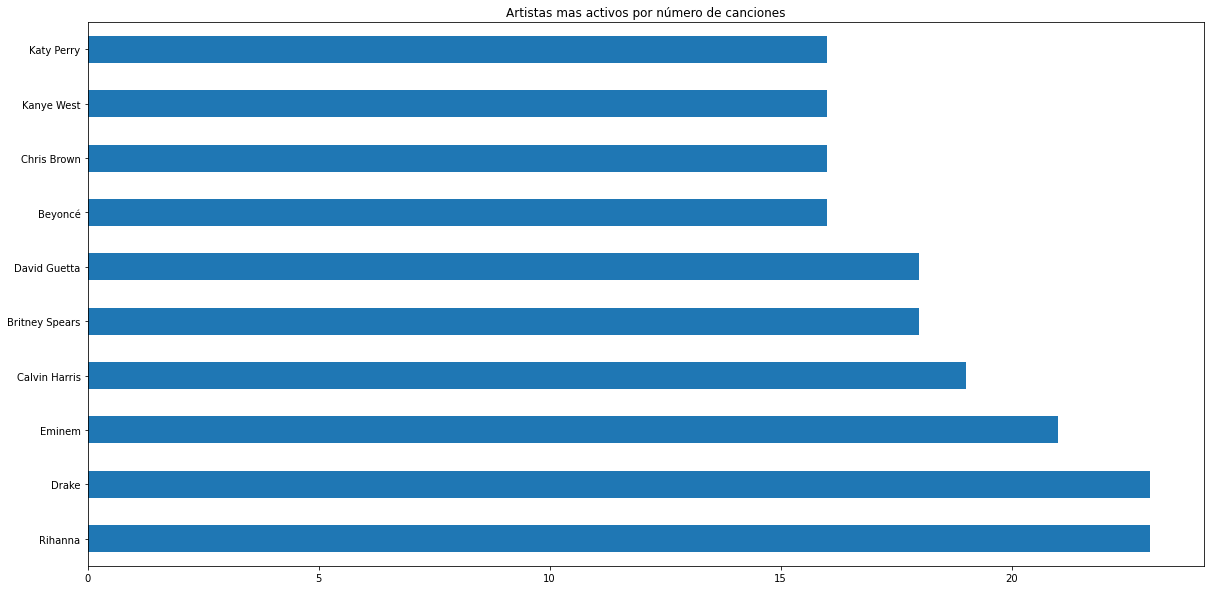

In [6]:
#Se fltran el DataFrame a los que cumplan la condición de ser mayor o igual al año 2000. 
#Se elige el año 2000 debido que los datos se encuentran como máximop hasta el año 2020
mostpopular10=sdf[sdf['year']>=2000]
mean10=mostpopular10['artist'].value_counts().head(10)
print('A continuación se muestran los artistas con mayor número de canciones desde el año 2000')
gmean=mean10.plot(figsize=(20,10), kind='barh', title='Artistas mas activos por número de canciones', fontsize=10)

#### En el gráfico anterior se observan los artistas mas activos con respecto al número de canciones publicadas en los últimos 10 años

A continuación se muestran los artistas con mayor popularidad promedio desde el año 2000


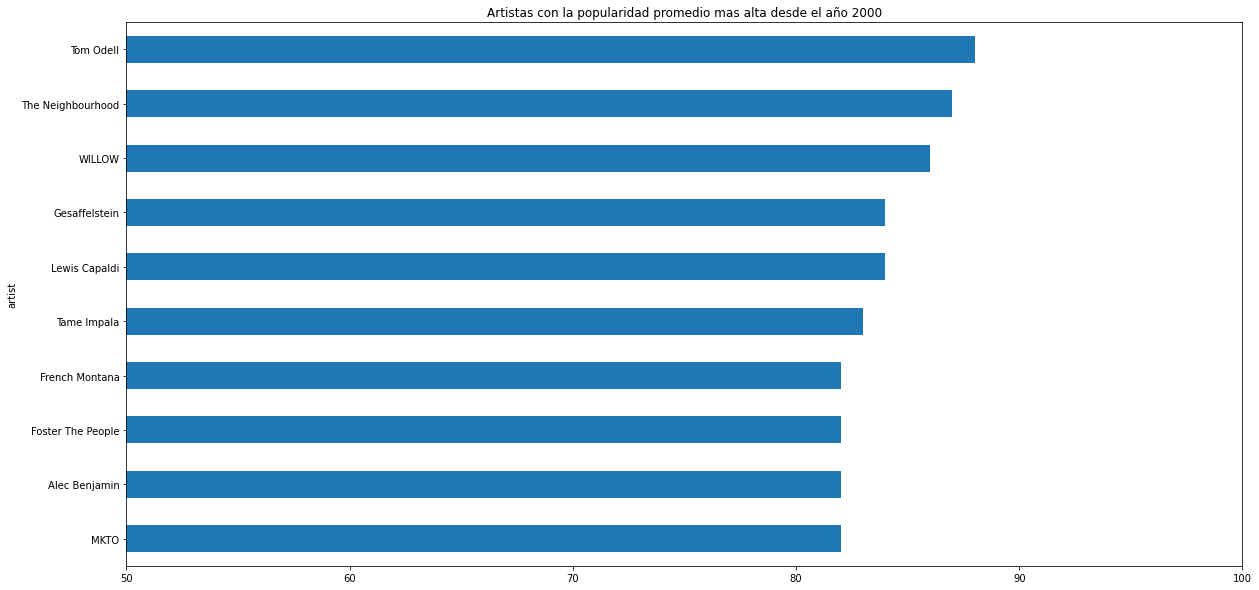

In [7]:
#Para este caso se filtran los artistas por su popularidad promedio mayor en los últimos 10 años
mp=mostpopular10.groupby('artist').mean()['popularity']
mp=mp.sort_values()
mp=mp.tail(10)
print('A continuación se muestran los artistas con mayor popularidad promedio desde el año 2000')
mp1=mp.plot(figsize=(20,10), kind='barh',xlim=[50,100],title='Artistas con la popularidad promedio mas alta desde el año 2000', fontsize=10)

#### En el gráfico anterior se observan los artistas con el promedio de popularidad más alta en los últimos 10 años

## Punto 2

### ¿Cómo se diferencian las canciones de los géneros de Latin y Folk/Acoustic en relación con su duración? Halle la diferencia del tiempo promedio de ambos géneros.

La diferencia promedio de duración es: 6400.05 ms


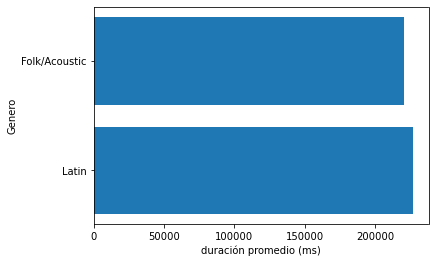

In [8]:
#Cálculo de la diferencia de promedio
Latin=sdf[sdf['genre;'].str.contains('latin')]
FA=sdf[sdf['genre;'].str.contains('Folk/Acoustic')]
meanLatin=Latin['duration_ms'].mean()
meanLatin1=Latin['duration_ms']
meanFA=FA['duration_ms'].mean()
diferencia=meanLatin-meanFA
diferencia=round(diferencia,2)
#Gráfico
fig, az=plt.subplots()
plt.xlabel('duración promedio (ms)')
plt.ylabel('Genero')
meanLatin=Latin['duration_ms'].mean()
x=('Latin', 'Folk/Acoustic')
y=(meanLatin, meanFA)
az.barh(x,y)
print("La diferencia promedio de duración es:",diferencia,"ms")
plt.show()

## Punto 3

### Halle el top 5 de los géneros del 2019 según la cantidad de canciones. ¿Cómo ha variado la cantidad de canciones del Top de géneros en los años 2000, 2005, 2010, 2015, 2019?

In [9]:
# Se crea un nuevo DataFrame segmentado por los diferentes tipos de genero musical cuando aplica
# Separamos la columna de genero
sdf_s=sdf['genre;'].str.split(',', expand=True)
sdf_s.columns=["Genero_1", "Genero_2","Genero_3", "Genero_4"]
# Concatenamos los DataFrame obtenidos en los generos 
sdf_s=pd.concat([sdf, sdf_s], axis=1)
#Eliminamos los valores nulos de los nuevos DataFrame
sdf_s1=sdf_s[['year', 'Genero_1']].dropna()
sdf_s2=sdf_s[['year', 'Genero_2']].dropna()
sdf_s3=sdf_s[['year', 'Genero_3']].dropna()
sdf_s4=sdf_s[['year', 'Genero_4']].dropna()
#Renombramos las comumnas de genero
sdf_s1.columns=['year','Genero']
sdf_s2.columns=['year','Genero']
sdf_s3.columns=['year','Genero']
sdf_s4.columns=['year','Genero']
#Concatenamos añadiendo nuevas filas con los generos separados en el DataFrame
sdf_s5=pd.concat([sdf_s1,sdf_s2,sdf_s3,sdf_s4])
g1p5_2019=sdf_s5[sdf_s5['year']==2019]['Genero'].value_counts().rename_axis('genero').reset_index(name='2019')
top5_2019=g1p5_2019.head(5)
#Generamos nuevos DataFrame filtrando por el año correspondiente
g1p5_2000=sdf_s5[sdf_s5['year']==2000]['Genero'].value_counts().rename_axis('genero').reset_index(name='2000')
g1p5_2005=sdf_s5[sdf_s5['year']==2005]['Genero'].value_counts().rename_axis('genero').reset_index(name='2005')
g1p5_2010=sdf_s5[sdf_s5['year']==2010]['Genero'].value_counts().rename_axis('genero').reset_index(name='2010')
g1p5_2015=sdf_s5[sdf_s5['year']==2015]['Genero'].value_counts().rename_axis('genero').reset_index(name='2015')
#Realizamos la intesección de los DataFrame para todos los años de interes.
n1=pd.merge(top5_2019, g1p5_2015, how='left')
n2=pd.merge(n1, g1p5_2010, how='left')
n3=pd.merge(n2, g1p5_2005, how='left')
n4=pd.merge(n3,g1p5_2000, how='left')

Histórico del número de canciones por genero en función del top 5 del año 2019


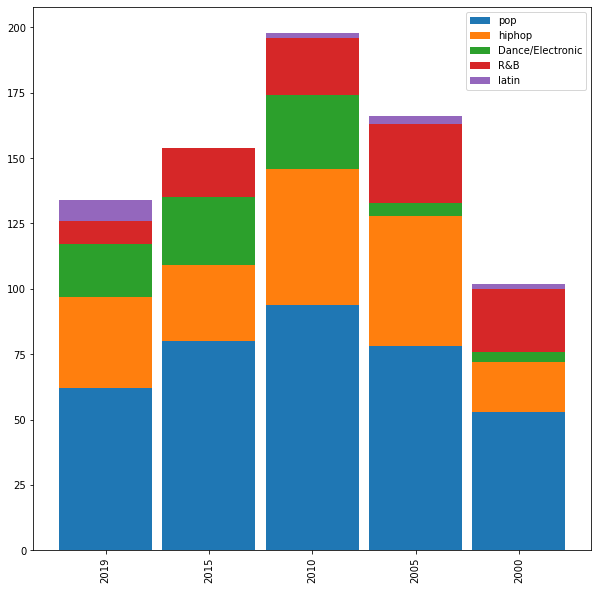

In [10]:
#Gráficamos como los 5 géneros top del año 2019 han variado en los años especificados
n5=n4.iloc[:,0].to_numpy().transpose().tolist()
n6=n4.transpose()
n7=n6.drop(["genero"])
n7.columns=n5
print('Histórico del número de canciones por genero en función del top 5 del año 2019')
op6=n7.plot(kind = 'bar', 
             stacked = 'True',          # Muestra las barras apiladas
             width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(10,10))

## Punto 4

### ¿Cómo ha sido la progresión de nuevos artistas? Asuma que un artista nuevo es aquel del cual no se tiene registros pasados y solo es nuevo durante el primer año de aparición.


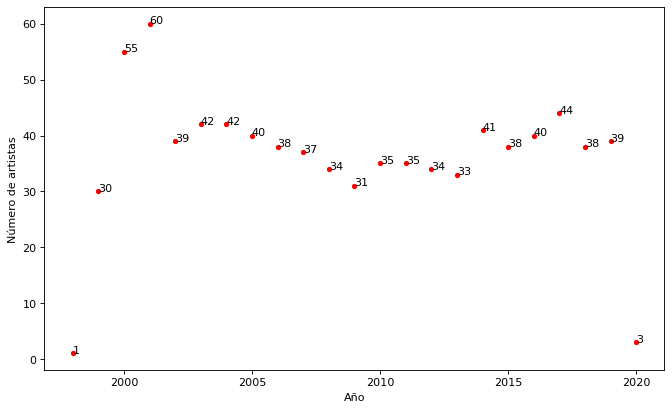

In [11]:
#Se obtiene un DataFrame nuevo con las columnas de artista y año, posteriormente se eliminan los datos repetidos con respecto
#al artista, con la salvedad que se conserve el primer valor de encontrado, con esto garantizamos que sea el primer año de aparició
sdf_4=sdf[['artist','year']]
año=sdf_4.sort_values(by='year')
año=año.drop_duplicates(['artist'], keep='first')
newartist=año['year'].value_counts()
newartist=pd.DataFrame(newartist)
x=newartist.index.to_list()
y=newartist.year.to_list()
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(x, y, color="red",s=5, linewidth=2.5, linestyle="-")
plt.xlabel('Año')
plt.ylabel('Número de artistas')
annotations=y
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)
plt.show()

#### En el gráfico se observa que no hay una tendencia de aumento del número de artistas nuevo por año, es importante resaltar que posiblemente en el año 2020 se tega un valor tan bajo por falta de registros en ese año

## Punto 5

### Grafique la progresión de la popularidad promedio por género y por año. Concluya sobre la gráfica, ej: ¿existen tendencias?

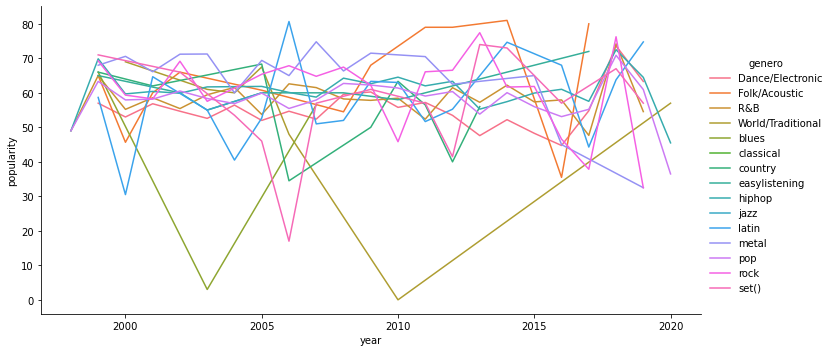

In [12]:
# Se filtra el DataFram por año, genero y popularidad. Se realiza un agrupamiento por genero y año, y por último se realiza
# un gráfico que contenga el comportamiento de la popularidad de cada uno de los generos a través de los años
tg1=sdf_s[['year', 'Genero_1','popularity']].dropna()
tg2=sdf_s[['year', 'Genero_2','popularity']].dropna()
tg3=sdf_s[['year', 'Genero_3','popularity']].dropna()
tg4=sdf_s[['year', 'Genero_4','popularity']].dropna()
tg1.columns=['year','genero','popularity']
tg2.columns=['year','genero','popularity']
tg3.columns=['year','genero','popularity']
tg4.columns=['year','genero','popularity']
tg5=pd.concat([tg1,tg2,tg3,tg4])
tg5['genero']=tg5['genero'].replace(r'^s*$', np.NaN, regex=True)
tg5=tg5.dropna(subset='genero')
g1=tg5.groupby(['genero','year'], as_index=False).mean()
snb.relplot(data=g1, x='year', y='popularity', hue='genero', kind='line', height=5,aspect = 2)

#### Como se observa en el gráfico anterior, no hay una tendencia clara de la popularidad de los generos a través del tiempo, se puede observar por ejemplo, que no hay un aumento progresico de algún genero en particular

## Punto 6

###  Compare los géneros Pop y Rock según sus características de: energy, valence y tempo. Concluya sobre su análisis.

La energía promedio de los generos Pop y Rock son: 119.7 y 126.2 repectivamente.


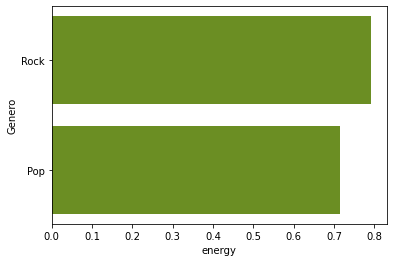

El Valence promedio de los generos Pop y Rock son: 0.6 y 0.5 repectivamente.


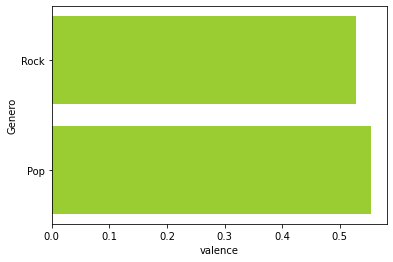

El Tempo promedio de los generos Pop y Rock son: 119.7 y 126.2 repectivamente.


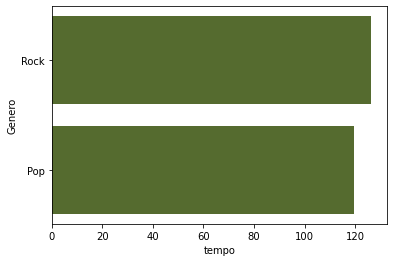

In [13]:
g_pop=sdf[sdf['genre;'].str.contains('pop')]
g_rock=sdf[sdf['genre;'].str.contains('rock')]
#Energy
meanpop_energy=g_pop['energy'].mean()
meanrock_energy=g_rock['energy'].mean()
#Valance
meanpop_valence=g_pop['valence'].mean()
meanrock_valence=g_rock['valence'].mean()
#Tempo
meanpop_tempo=g_pop['tempo'].mean()
meanrock_tempo=g_rock['tempo'].mean()
#Energy
print('La energía promedio de los generos Pop y Rock son:',round(meanpop_tempo,1), 'y', round(meanrock_tempo,1),'repectivamente.')
x=('Pop', 'Rock')
y=(meanpop_energy, meanrock_energy)
fig, energy=plt.subplots()
plt.xlabel('energy')
plt.ylabel('Genero')
energy.barh(x,y, color='olivedrab')
plt.show()
#Valance
print('El Valence promedio de los generos Pop y Rock son:',round(meanpop_valence,1), 'y', round(meanrock_valence,1),'repectivamente.')
x=('Pop', 'Rock')
y=(meanpop_valence, meanrock_valence)
fig, valence=plt.subplots()
plt.xlabel('valence')
plt.ylabel('Genero')
valence.barh(x,y,color='yellowgreen')
plt.show()
#Tempo
print('El Tempo promedio de los generos Pop y Rock son:',round(meanpop_tempo,1), 'y', round(meanrock_tempo,1),'repectivamente.')
x=('Pop', 'Rock')
y=(meanpop_tempo, meanrock_tempo)
fig, tempo=plt.subplots()
plt.xlabel('tempo')
plt.ylabel('Genero')
tempo.barh(x,y, color='darkolivegreen')
plt.show()


### Energía
Se espera que en promedio la energía del genero rock sea mas energíco que el pop debido su tipo de música, voces e instruemtnos. Cosa que se puede conlcuir del primer gráfico debido a que en promedio la música rock tiene mayor energía que la música pop.
### Valence
Se espera que la psotividad de la música pop sea mayor, igualmente por el tipo de musica. Cómo se observa el el g´rafico de valence, se obtiene un mayor valor promedio en la música pop.
### Tempo
En terminos de tempo, igual se esperaba que por el genero, el rock tuviese un valor promedio mayor, como se observa en el gráfico y los valores obtenidos.

## Punto 7
### Plantee una pregunta de negocio de su interés, ya sea por tipo de música, artistas u otra dimensión, mediante la cual se analicen al menos 3 variables del dataset y concluya.

#### ¿Es posible que de las variables como la duración, la energía, el tempo entre otras tenga relación con la popularidad de la cación? Por ejemplo, una canción con mayor cantidad de mensajes positivos o mayor energía sea mas popular en esta plataforma.

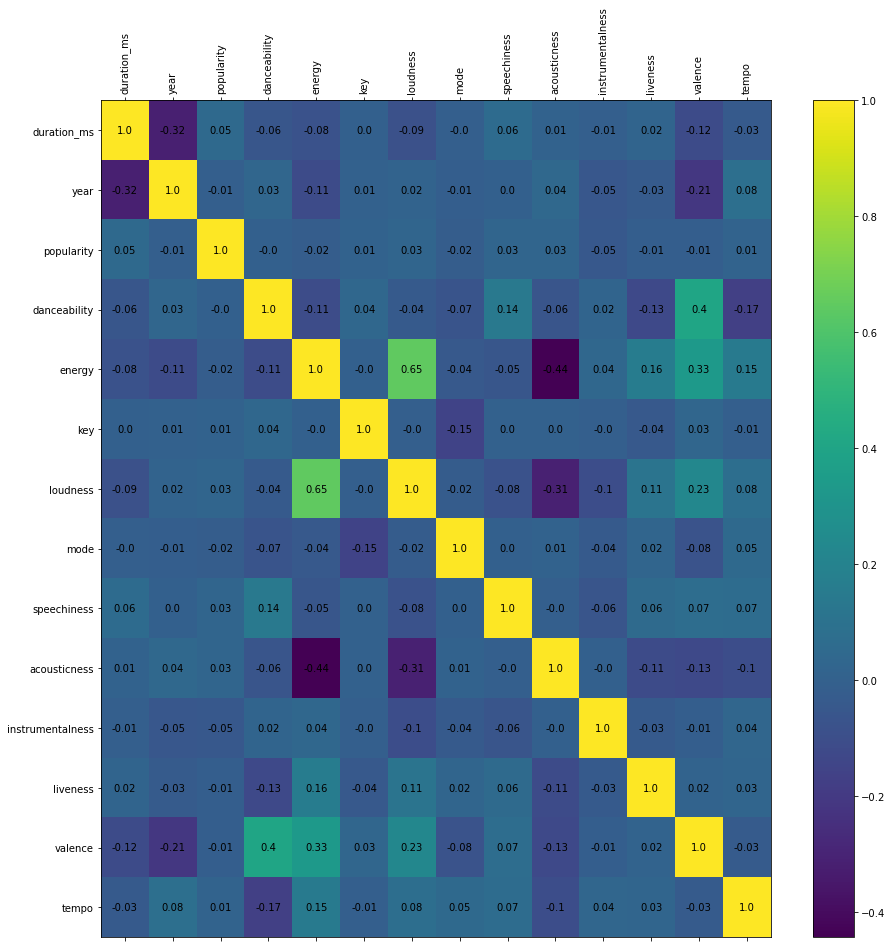

In [14]:
# Obtener la matriz de correlación 
matriz=sdf.corr()
names=sdf.corr()
plt.figure(figsize=(15,15))
plt.matshow(matriz,fignum=1, aspect='auto')
plt.xticks(range(14),names, rotation=90)
plt.yticks(range(14),names)

for i in range(len(matriz.columns)):
    for j in range(len(matriz.columns)):
        plt.text(i, j, round(matriz.iloc[i,j],2),ha="center", va="center")

plt.colorbar()
plt.show()


#### Cómo se observa en el mapa de calor de las variables cuantitativas del DataFrame, no se observa que haya una correlación alta con la popularidad, posiblemente esto sea un factor más relacionado con el artista. 
#### Pero es importante resaltar que este análisis se podría realizar con respecto a la popularidad de otras plataformas, como por ejemplo, TikTok. Puede que una canción con determinadas características en su musicalidad tenga mayor probabilidad de volverse viral en estas plataformas y por ello aumente su popularidad significativamente.
#### La posibilidad de volverse viral puede llegar a tener ralación con que tan bailable es la canción para realizar trends o incluso si es explicita o no.